In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set the max columns to none
pd.set_option('display.max_columns', None)

sns.set_theme(style="whitegrid", 
              palette="Set2")
sns.set_style({"grid.color": ".8", "grid.linestyle": "--"})

In [3]:
df = pd.read_csv('./data_processed.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Recommend Rating,CEO Rating,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work/Life Balance,Province,salary_src,min_salary,max_salary,avg_salary,company_txt,age,python,r,spark,sql,aws,excel,tableau,powerBI,azure,french,exp_level,field
0,Senior Statistical Programmer - FSP Oncology,$124K - $131K (Employer Est.),Overview:\n\nTHE COMPANY\n\nPHASTAR is a multi...,4.2,PHASTAR\n4.2,Remote,201 to 500 Employees,2007,Company - Private,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable,85 %,89 %,4.1,3.6,4.4,4.0,4.3,Remote,Employer,124,131,127.5,PHASTAR,13,0,0,0,0,0,1,0,0,0,0,Senior,Not Specified
1,End User Technology Services Sr.Mgr - Complian...,$124K - $131K (Employer Est.),Job Type: DTTL - Secondment\nReference code: 1...,4.0,Deloitte\n4.0,Toronto,10000+ Employees,1850,Company - Private,Accounting & Tax,Finance,$2 to $5 billion (USD),82 %,91 %,4.2,3.7,4.0,3.8,3.2,ON,Employer,124,131,127.5,Deloitte,170,0,0,0,1,0,0,0,0,1,0,Senior,Not Specified
2,Senior Statistical Programmer - FSP Oncology- ...,$124K - $131K (Employer Est.),Overview:\nTHE COMPANY\nPhastar is a multiple ...,4.2,PHASTAR\n4.2,Remote,201 to 500 Employees,2007,Company - Private,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable,85 %,89 %,4.1,3.6,4.4,4.0,4.3,Remote,Employer,124,131,127.5,PHASTAR,13,0,0,0,0,0,1,0,0,0,0,Senior,Not Specified
3,"Data Scientist, Automation",$124K - $131K (Employer Est.),About the Role\nOur Operations teams work wher...,4.0,Uber\n4.0,Toronto,10000+ Employees,2009,Company - Public,Internet & Web Services,Information Technology,$10+ billion (USD),75 %,77 %,3.4,3.6,3.7,3.3,3.8,ON,Employer,124,131,127.5,Uber,11,1,0,0,1,0,1,0,0,0,0,Not Specified,Data Scientist
4,Entry Level Sales - Data Scientist,$124K - $131K (Employer Est.),"Introduction\nAs a Data Scientist at IBM, you ...",4.0,IBM\n4.0,Calgary,10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD),81 %,86 %,3.9,3.5,4.0,3.6,4.0,AB,Employer,124,131,127.5,IBM,109,1,1,1,1,1,0,0,1,1,0,Not Specified,Data Scientist


In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Recommend Rating', 'CEO Rating', 'Career Opportunities',
       'Comp & Benefits', 'Culture & Values', 'Senior Management',
       'Work/Life Balance', 'Province', 'hourly', 'salary_src', 'min_salary',
       'max_salary', 'avg_salary', 'company_txt', 'age', 'python', 'r',
       'spark', 'sql', 'aws', 'excel', 'tableau', 'powerBI', 'azure', 'french',
       'exp_level', 'field'],
      dtype='object')

In [157]:
df.field.value_counts()

field
Data Scientist    156
Not Specified     148
MLE                90
Data Analyst       60
Manager            42
Data Engineer       4
Name: count, dtype: int64

Text(0.5, 1.0, 'Data Science Job Distribution')

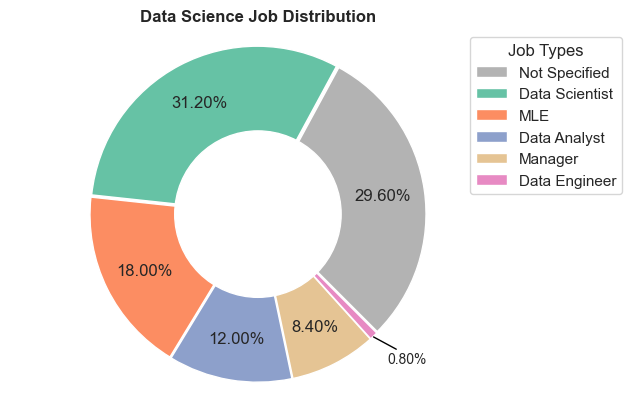

In [279]:
counts = df.field.value_counts()

labels = list(counts.index)
sizes = counts.values
labels[0], labels[1] = labels[1], labels[0]
sizes[0], sizes[1] = sizes[1], sizes[0]

# Create the donut pie plot
fig, ax = plt.subplots()
explode = [0.01]*len(labels)
# wedgeprops = {"linewidth": 1, "width": 0.7, "edgecolor": "k"}
patches, label_text, size_text = plt.pie(sizes,
                                explode=explode,
#                                 labels=labels,
#                                 labeldistance=1.1,
                                colors=[sns.color_palette('Set2')[i] for i in [-1,0,1,2,-2,3]],
                                autopct='%3.2f%%',
                                shadow=False,
                                startangle=-45,
                                pctdistance=0.75)

# draw the circle to make donut
circle = plt.Circle((0, 0), 0.5, fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)
# patches: pie chart，texts1: label text，texts2: pie chart text
plt.axis('equal')
plt.legend(labels, title='Job Types', loc='upper right', bbox_to_anchor=(1.25, 1))

'''Handle small piece'''
# Adjust the label position for the specific slice
angle = (patches[-1].theta2 - patches[-1].theta1) / 2. + patches[-1].theta1
x = 1.3 * patches[-1].r * np.cos(np.deg2rad(angle))
y = 1.2 * patches[-1].r * np.sin(np.deg2rad(angle))
plt.text(x, y, f'{size_text[-1].get_text()}', ha='center', va='center', fontsize=10)
# Add a line connecting the number to the slice
arrowprops = dict(arrowstyle='-', color='black')
plt.annotate('', xy=(x-0.05, y+0.05), xytext=(0.68, -0.73), arrowprops=arrowprops)
# Remove the label for the small number
size_text[-1].set_text('')

plt.title('Data Science Job Distribution', fontweight='bold')

In [173]:
df.exp_level.value_counts()

exp_level
Senior           273
Not Specified    217
Intern             8
Junior             2
Name: count, dtype: int64

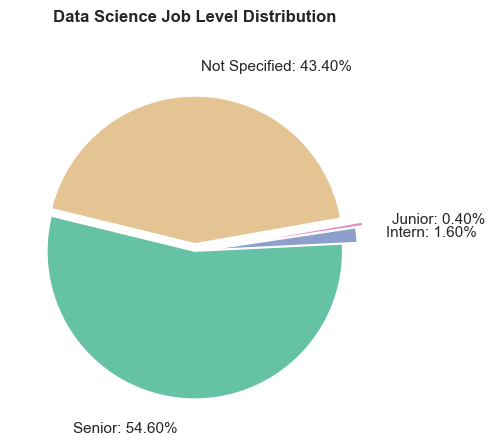

In [269]:
counts = df.exp_level.value_counts(dropna=False)

labels = list(counts.index)
sizes = counts.values
labels[0], labels[1] = labels[1], labels[0]
sizes[0], sizes[1] = sizes[1], sizes[0]
explode = [0.05, 0, 0.1, 0.15]  # Emphasize 'Intern' and 'Junior' slices

fig, ax = plt.subplots()
ax.pie(sizes, 
       labels=[f'{label}: {size / sum(sizes) * 100:3.2f}%' for label, size in zip(labels, sizes)], 
       explode=explode, 
#        autopct='%1.2f%%', 
       colors=[sns.color_palette('Set2')[i] for i in [-2,0,2,3]],
       startangle=10,
      labeldistance=1.2)
ax.set_aspect('equal')  # Ensure the pie is circular

# Add a title
plt.title("Data Science Job Level Distribution", fontweight='bold', y=1.1)


plt.show()


In [ ]:
ax = sns.countplot(x='field', data=df, palette=sns.color_palette("pastel", 5))
ax.set_xlabel('')
plt.show()

In [10]:
df.Location.value_counts()

Location
Toronto            189
Remote             157
Mississauga         42
Canada              30
Montreal            27
Vancouver           19
Edmonton            13
Calgary              4
Waterloo             3
Quebec               3
North Vancouver      2
Brampton             2
Saint-Léonard        2
Dorval               2
Midtown Toronto      1
St. John's           1
Halifax              1
Fredericton          1
Oakville             1
Name: count, dtype: int64

In [11]:
df.Province.value_counts()

Province
ON        235
Remote    157
QC         37
Canada     30
BC         21
AB         17
NB          2
NS          1
Name: count, dtype: int64

In [25]:
province = df.Province.apply(lambda x: 'Remote/Canada' if x in ['Remote', 'Canada'] else x)
province.value_counts()

Province
ON               235
Remote/Canada    187
QC                37
BC                21
AB                17
NB                 2
NS                 1
Name: count, dtype: int64

Text(0.5, 1.0, 'Data Science Job Distribution')

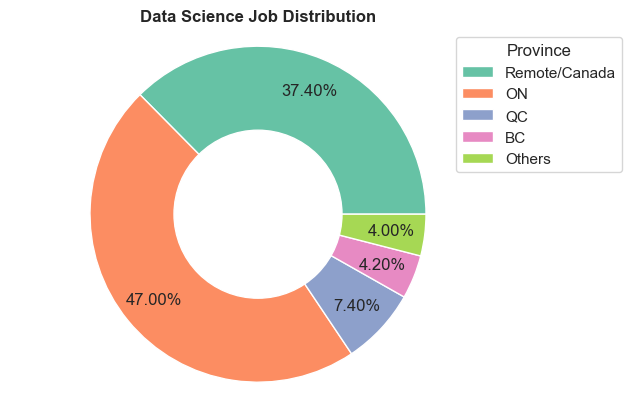

In [26]:
counts = province.value_counts()
labels = list(counts.index)
sizes = counts.values
labels[0], labels[1] = labels[1], labels[0]
sizes[0], sizes[1] = sizes[1], sizes[0]

'''Combine small pieces into 'Others' category'''
threshold = 20  
# Find the indices of small pieces
small_indices = np.where(sizes < threshold)[0]
others_label = 'Others'
others_size = np.sum(sizes[small_indices])
# Remove small pieces from labels and sizes
labels = [label for i, label in enumerate(labels) if i not in small_indices]
sizes = [size for i, size in enumerate(sizes) if i not in small_indices]
# Add 'Others' category
labels.append(others_label)
sizes.append(others_size)

# Create the donut pie plot
fig, ax = plt.subplots()
explode = [0] * len(labels)

patches, label_text, size_text = plt.pie(
    sizes,
    explode=explode,
    colors=sns.color_palette('Set2'),
    autopct='%3.2f%%',
    shadow=False,
    startangle=0,
    pctdistance=0.8
)

# draw the circle to make donut
circle = plt.Circle((0, 0), 0.5, fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)

# patches: pie chart, label_text: label text, size_text: pie chart text
plt.axis('equal')
plt.legend(labels, title='Province', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('Data Science Job Distribution', fontweight='bold')


In [8]:
df['Industry'] = df['Industry'].apply(lambda x: 'Not Specified' if x == '-1' else x)

In [9]:
df.Industry.value_counts()

Industry
Biotech & Pharmaceuticals                  107
Information Technology Support Services     76
Computer Hardware Development               63
Not Specified                               45
HR Consulting                               44
Machinery Manufacturing                     26
Video Game Publishing                       16
Colleges & Universities                     16
Research & Development                      15
Farm Support Services                       13
Accounting & Tax                            13
Healthcare Services & Hospitals             12
Insurance Carriers                           8
Internet & Web Services                      7
Enterprise Software & Network Solutions      6
Business Consulting                          4
Investment & Asset Management                4
Banking & Lending                            3
Real Estate                                  3
Wholesale                                    2
Advertising & Public Relations               2
Soft

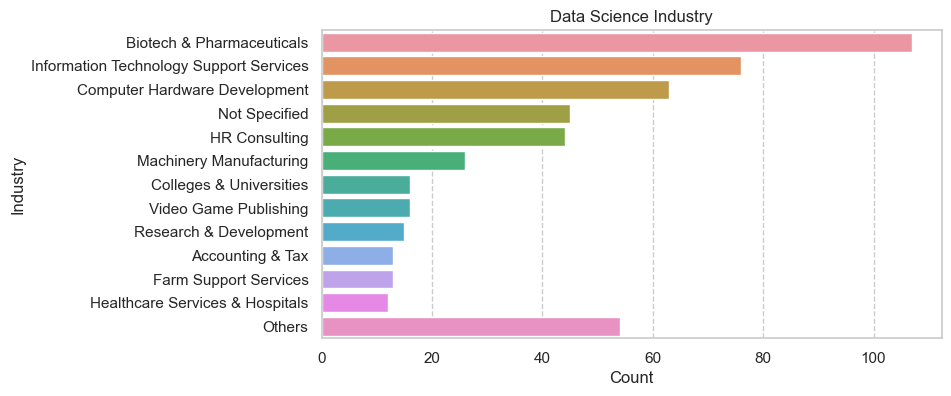

In [64]:
counts = df.Industry.value_counts()

# Identify the items with counts less than the threshold 
others = counts[counts < 10].index

# Create a modified Series with the combined categories
df_industry = df['Industry'].apply(lambda x: 'Others' if x in others else x).to_frame()

# Sort the modified Series by count values
df_industry['Count'] = df_industry['Industry'].map(counts)
df_industry.sort_values(by='Count', ascending=False, inplace=True)

# Create a count plot with the modified Series
plt.figure(figsize=(8, 4))
sns.countplot(data=df_industry, y='Industry', orient='h')

# Set the plot title and labels
plt.title('Data Science Industry')
plt.xlabel('Count')
plt.ylabel('Industry')

# Show the plot
plt.show()

In [315]:
df.describe()

,Rating,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work/Life Balance,min_salary,max_salary,avg_salary,age,python,r,spark,sql,aws,excel,tableau,powerBI,azure,french,jd_len
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.793600,1770.928000,3.593800,3.508400,3.794000,3.511400,3.713200,74.63000,94.602000,84.616000,26.652000,0.534000,0.106000,0.1000,0.438000,0.196000,0.554000,0.180000,0.184000,0.206000,0.098000,4196.070000
std,1.322853,624.599962,1.295832,1.322826,1.365362,1.291536,1.348489,18.41911,15.298748,16.799404,37.225884,0.499342,0.308146,0.3003,0.496638,0.397366,0.497573,0.384572,0.387872,0.404836,0.297612,2302.316814
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,27.00000,59.000000,43.000000,-1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1054.000000
25%,3.800000,1988.000000,3.500000,3.400000,3.700000,3.600000,3.500000,70.00000,90.000000,80.000000,13.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2673.000000
50%,4.200000,2002.000000,4.100000,3.600000,4.400000,4.000000,4.300000,70.00000,90.000000,80.000000,13.000000,1.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4170.000000
75%,4.300000,2007.000000,4.200000,4.100000,4.500000,4.100000,4.400000,70.00000,90.000000,80.000000,25.000000,1.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5270.000000
max,5.000000,2018.000000,4.700000,5.000000,5.000000,5.000000,4.900000,124.00000,131.000000,127.500000,193.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10627.000000


In [286]:
df.Headquarters.value_counts()

Headquarters
-1    500
Name: count, dtype: int64

In [287]:
df.Competitors.value_counts()

Competitors
-1    500
Name: count, dtype: int64

In [288]:
df.hourly.value_counts()

hourly
0    500
Name: count, dtype: int64

In [298]:
df.drop(columns=['Headquarters', 'Competitors', 'hourly'], inplace=True)

In [313]:
df['jd_len'] = df['Job Description'].apply(lambda x: len(x))

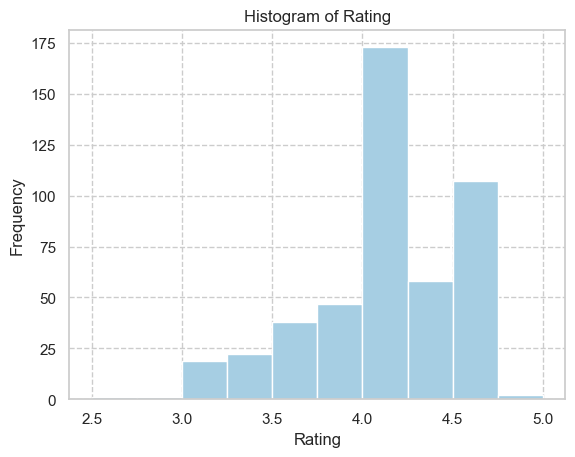

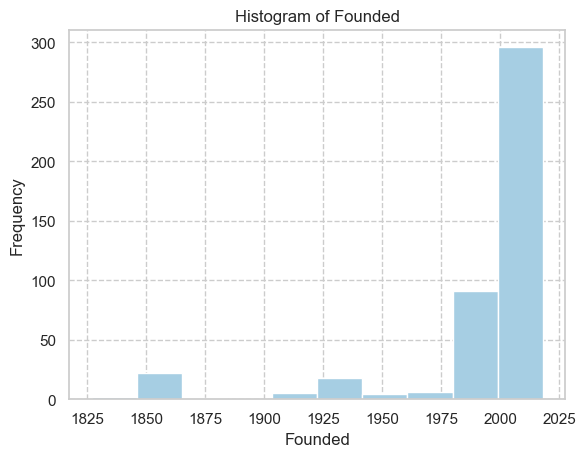

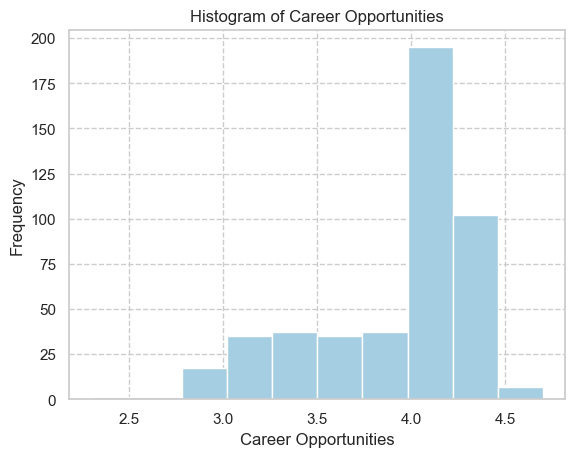

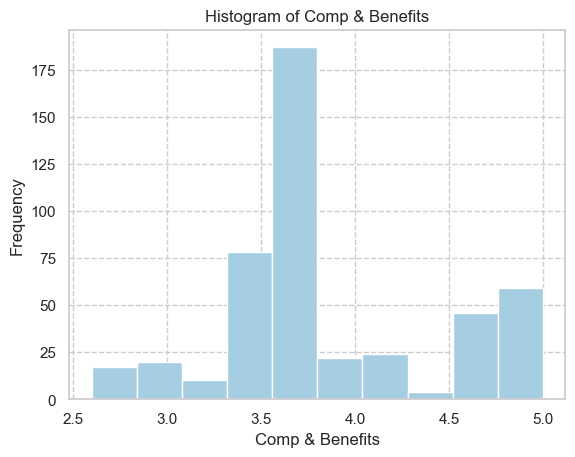

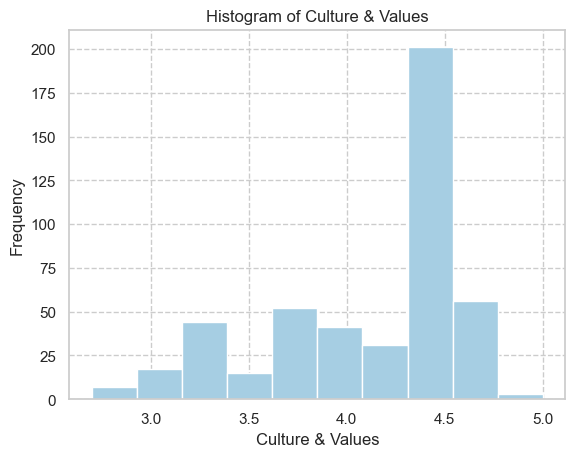

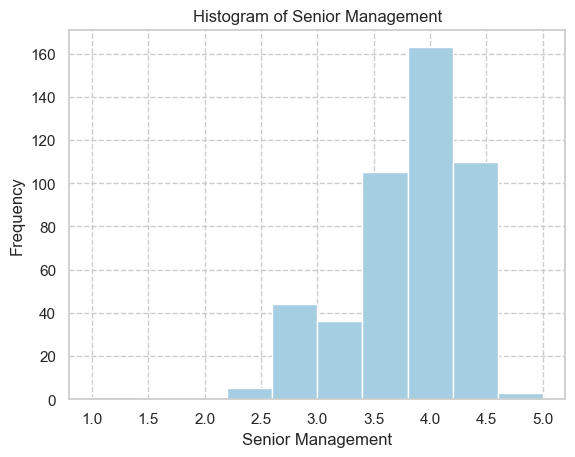

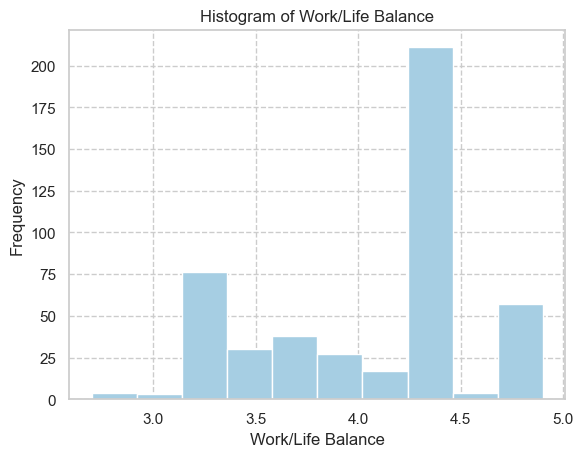

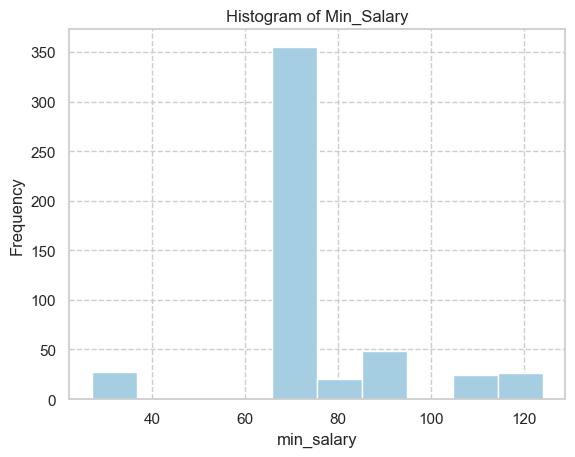

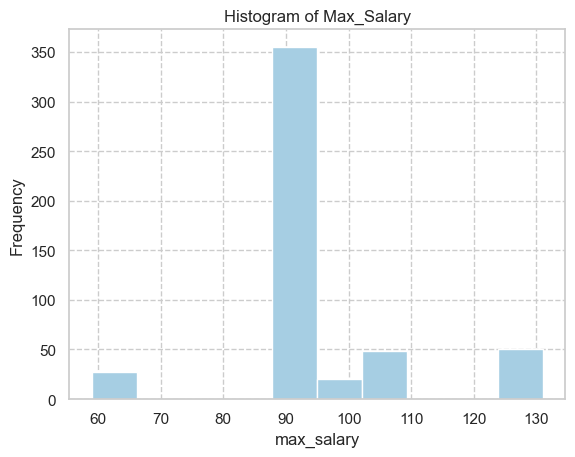

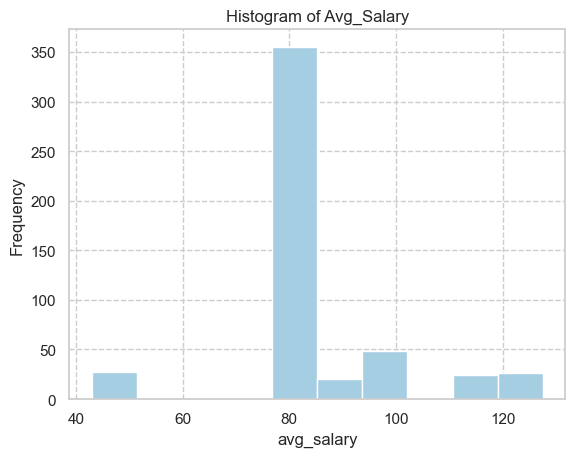

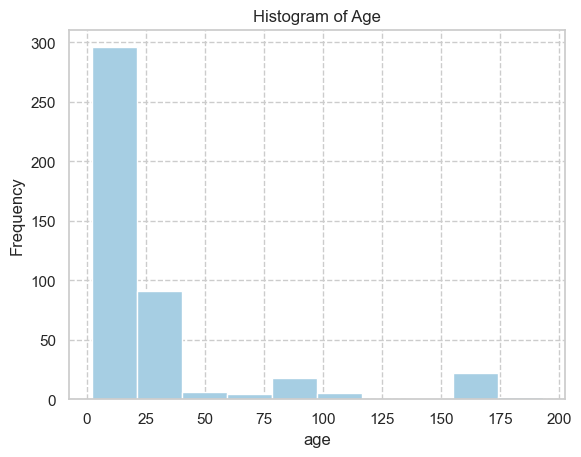

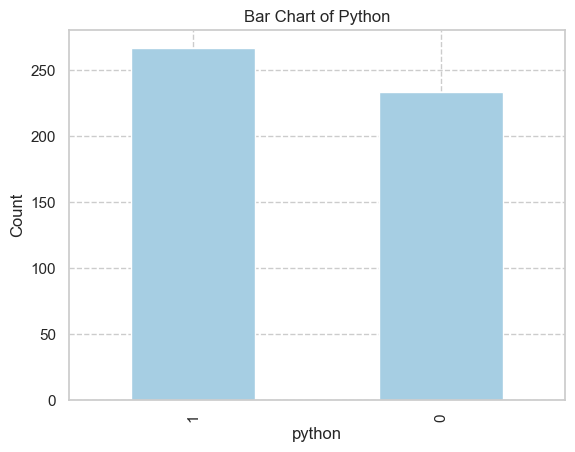

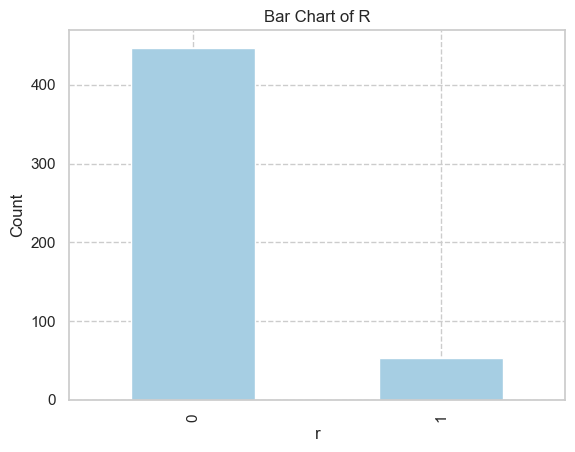

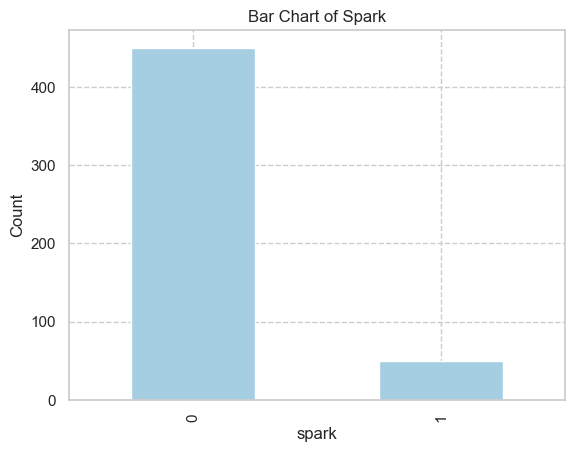

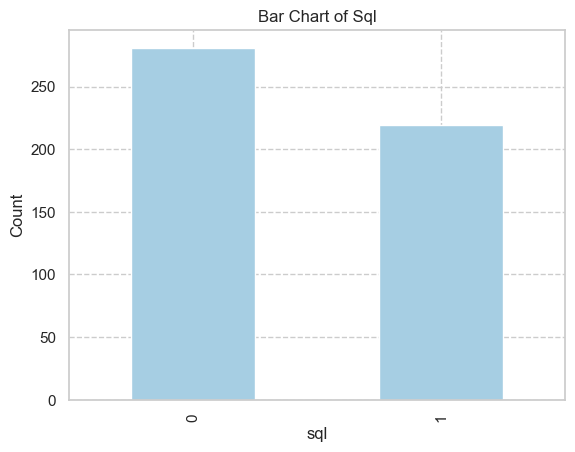

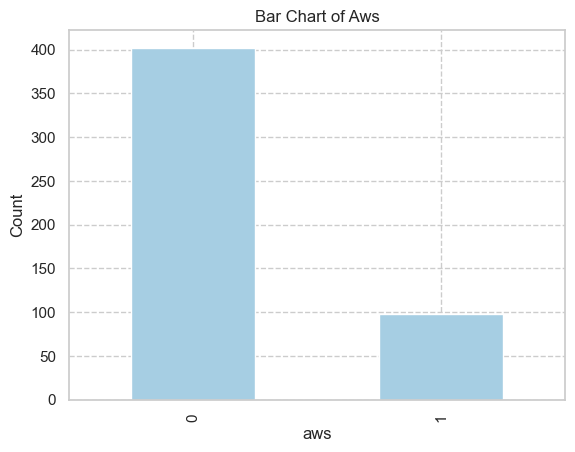

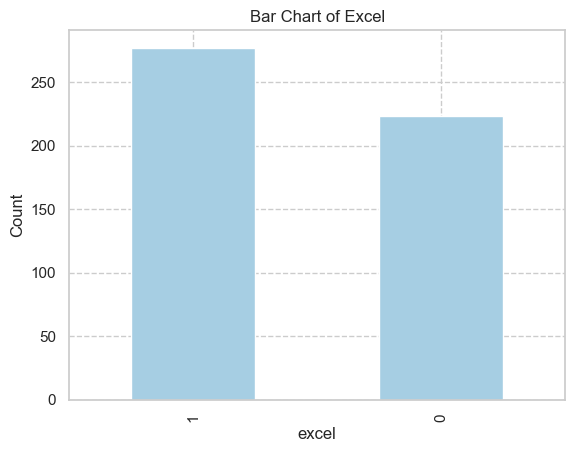

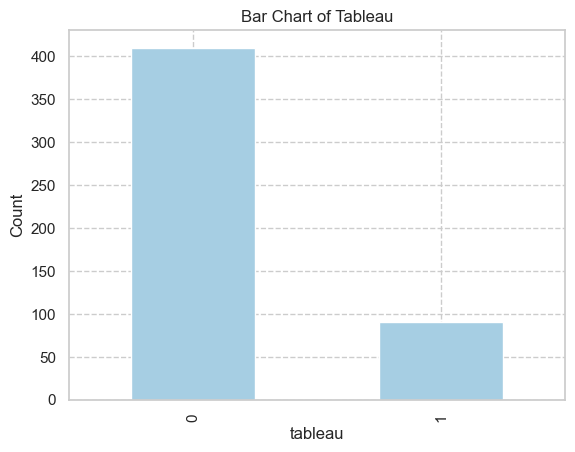

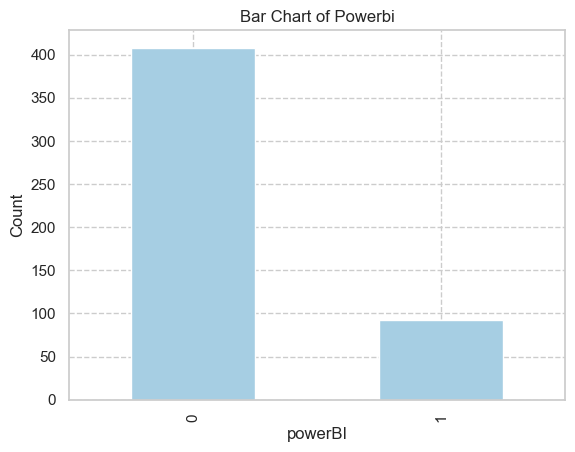

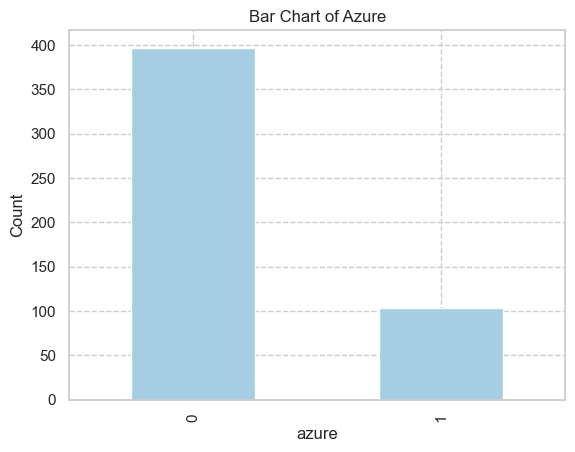

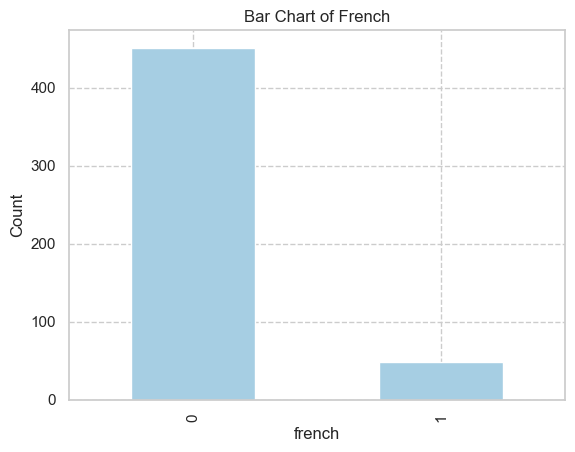

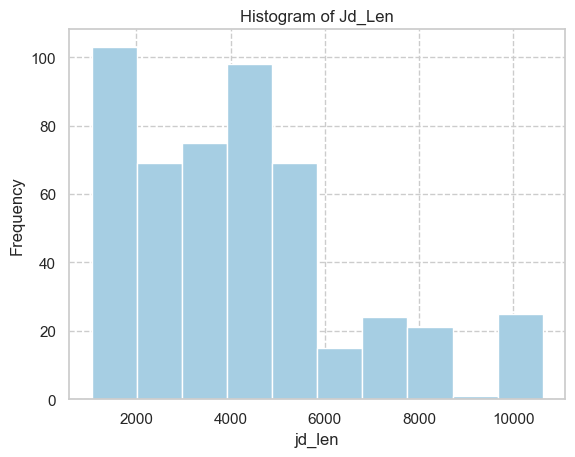

In [314]:
for column in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Check if the column contains only 0s and 1s
        if set(df[column].unique()) == {0, 1}:
            # Plot a bar chart for the column
            df[column].value_counts().plot(kind='bar')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.title(f'Bar Chart of {column.title()}')
            plt.show()
        else:
            # Plot histogram for numeric column
            plt.hist(df[df[column] != -1][column], bins=10)  # Adjust the number of bins as desired
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(f'Histogram of {column.title()}')
            plt.show()

<Axes: >

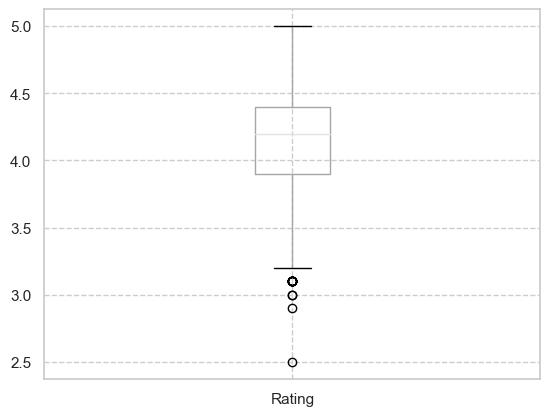

In [318]:
df[df['Rating'] != -1].boxplot(column='Rating')

<Axes: >

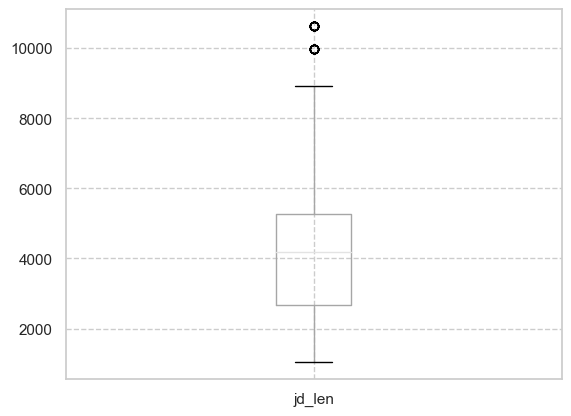

In [319]:
df.boxplot(column='jd_len')

<Axes: >

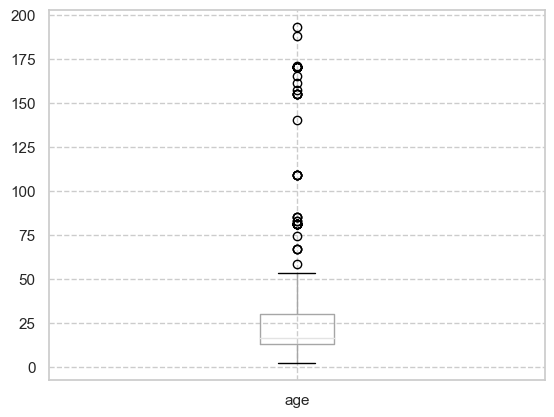

In [322]:
df[df['age'] != -1].boxplot(column='age')

<Axes: >

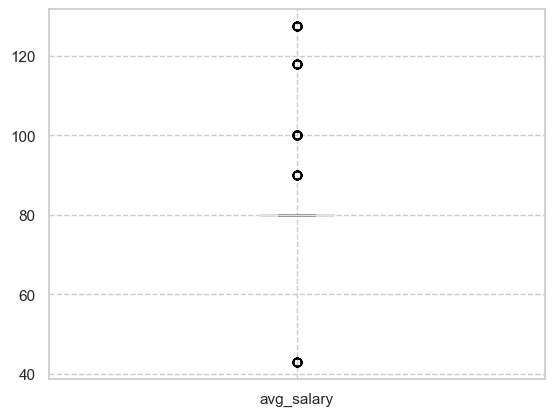

In [323]:
df.boxplot(column='avg_salary')

In [331]:
numerical_cols = df.select_dtypes(include=[np.number]).nunique()[df.select_dtypes(include=[np.number]).nunique() > 2].index.tolist()
n_df = df[numerical_cols]

<Axes: >

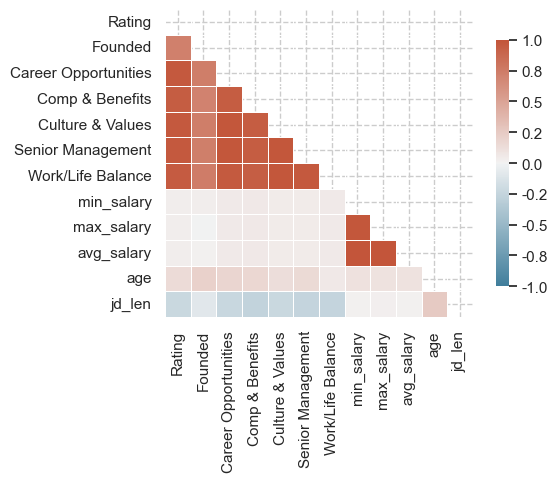

In [344]:
corr = n_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8, 'format': '%.1f'})

In [347]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Recommend Rating', 'CEO Rating',
       'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
       'Senior Management', 'Work/Life Balance', 'Province', 'salary_src',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'age',
       'python', 'r', 'spark', 'sql', 'aws', 'excel', 'tableau', 'powerBI',
       'azure', 'french', 'exp_level', 'field', 'jd_len'],
      dtype='object')

In [352]:
cat_df = df[['Type of ownership', 'Size', 'Industry', 'Sector', 'Revenue', 'salary_src']]

graph for Type of ownership: total = 6


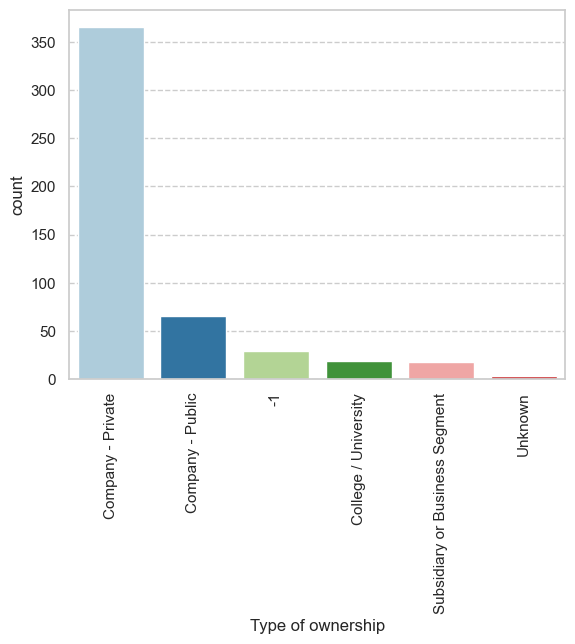

graph for Size: total = 9


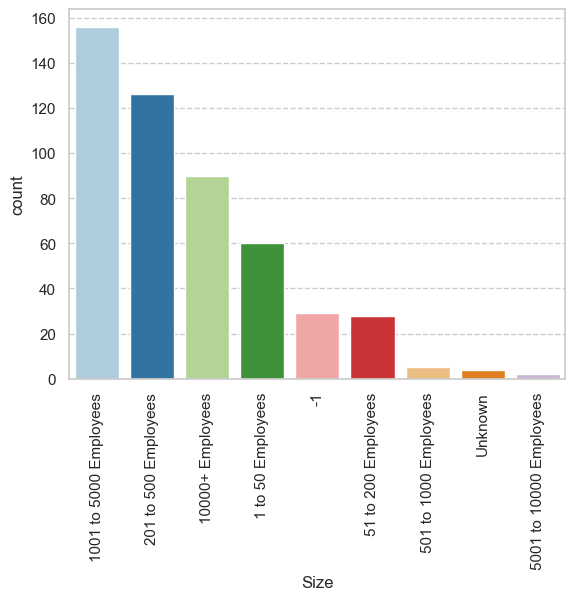

graph for Industry: total = 30


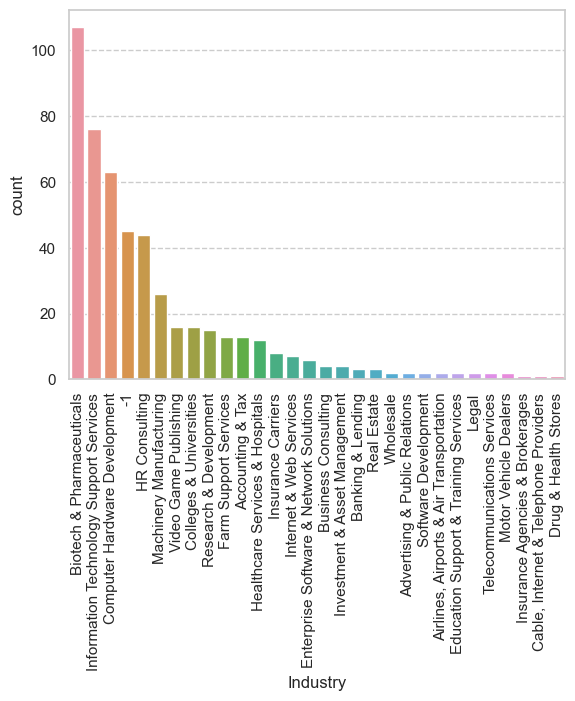

graph for Sector: total = 17


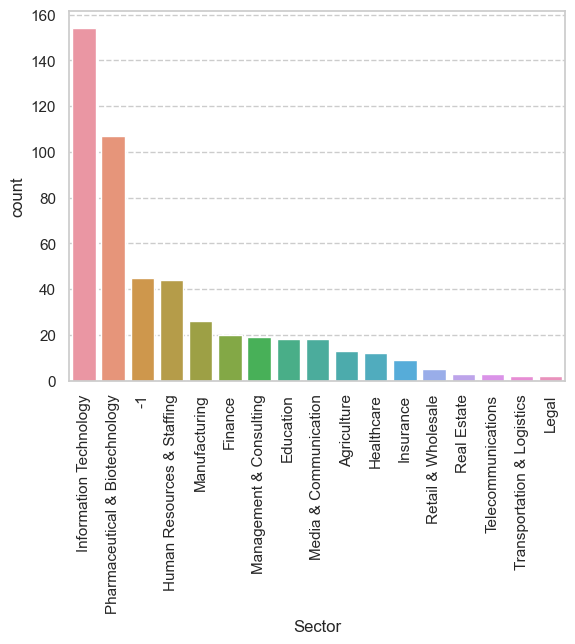

graph for Revenue: total = 9


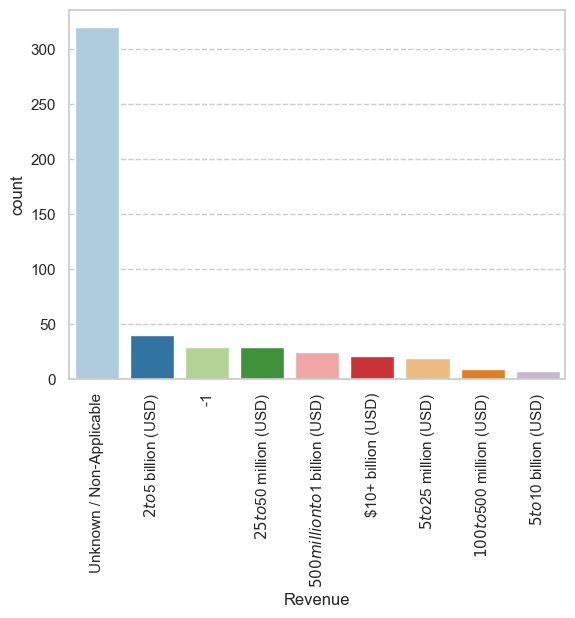

graph for Province: total = 8


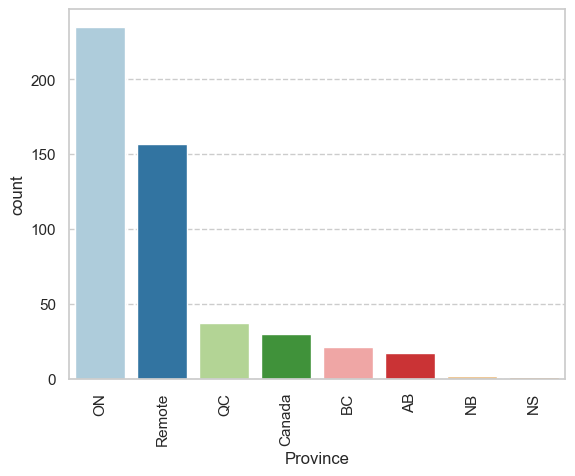

graph for salary_src: total = 2


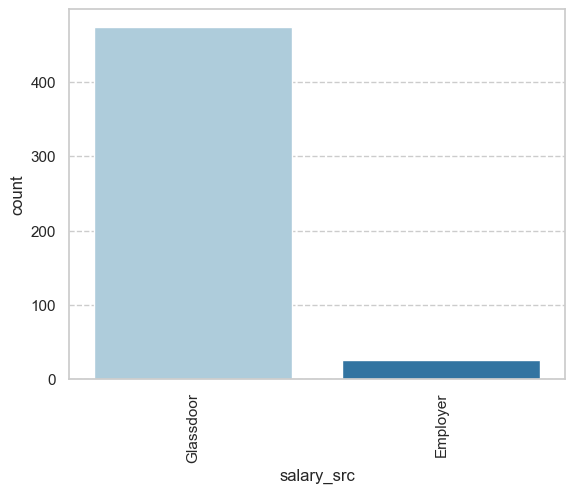

In [351]:
for i in cat_df.columns:
    cat_num = cat_df[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [354]:
pd.pivot_table(df, index = 'field', values = 'avg_salary')

,avg_salary
field,
Data Analyst,82.991667
Data Engineer,80.500000
Data Scientist,88.663462
MLE,81.044444
Manager,84.166667
Not Specified,83.418919


In [355]:
pd.pivot_table(df, index = ['field','exp_level'], values = 'avg_salary')

avg_salary
field          exp_level                
Data Analyst   Not Specified   82.564516
               Senior          83.448276
Data Engineer  Not Specified   80.500000
               Senior          80.500000
Data Scientist Intern          92.500000
               Junior         127.500000
               Not Specified   89.160194
               Senior          85.595745
MLE            Intern          87.000000
               Not Specified   79.000000
               Senior          83.000000
Manager        Senior          84.166667
Not Specified  Intern         127.500000
               Not Specified   81.308824
               Senior          83.663717

In [356]:
pd.pivot_table(df, index = ['Province','field'], values = 'avg_salary').sort_values('Province', ascending = False)

avg_salary
Province field                     
Remote   Not Specified    83.867925
         MLE              77.153846
         Data Scientist   83.920000
QC       Not Specified    76.800000
         Manager         100.000000
         Data Scientist  109.875000
         Data Engineer    80.500000
         Data Analyst     85.406250
ON       MLE              83.521739
         Not Specified    84.000000
         Manager          83.375000
         Data Scientist   87.515625
         Data Engineer    80.500000
         Data Analyst     80.263158
NS       Data Scientist   90.000000
NB       Data Scientist  108.750000
Canada   Not Specified    85.250000
         Data Scientist   90.000000
         Data Analyst     83.520000
BC       Data Scientist   80.500000
         Not Specified    43.000000
         MLE              80.333333
AB       Data Scientist   85.588235

In [357]:
pd.pivot_table(df, index = ['Province','field'], values = 'avg_salary', aggfunc = 'count').sort_values('Province', ascending = False)

avg_salary
Province field                     
Remote   Not Specified          106
         MLE                     26
         Data Scientist          25
QC       Not Specified            5
         Manager                  2
         Data Scientist          12
         Data Engineer            2
         Data Analyst            16
ON       MLE                     46
         Not Specified           32
         Manager                 40
         Data Scientist          96
         Data Engineer            2
         Data Analyst            19
NS       Data Scientist           1
NB       Data Scientist           2
Canada   Not Specified            4
         Data Scientist           1
         Data Analyst            25
BC       Data Scientist           2
         Not Specified            1
         MLE                     18
AB       Data Scientist          17

In [65]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Recommend Rating', 'CEO Rating',
       'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
       'Senior Management', 'Work/Life Balance', 'Province', 'salary_src',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'age',
       'python', 'r', 'spark', 'sql', 'aws', 'excel', 'tableau', 'powerBI',
       'azure', 'french', 'exp_level', 'field'],
      dtype='object')

In [66]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue',  'Recommend Rating', 'CEO Rating',
                'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
                'Senior Management', 'Work/Life Balance', 'Province', 'salary_src',
                'python', 'r', 'spark', 'sql', 'aws', 'excel', 'tableau', 'powerBI',
                'azure', 'french', 'Type of ownership','avg_salary']]

In [68]:
for i in df_pivots.columns:
    print('\n',i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))


 Rating
        avg_salary
Rating            
 4.9    127.500000
 3.2    108.750000
 3.7     94.833333
 2.9     90.000000
 3.0     90.000000
 4.5     88.333333
 4.0     88.156250
 3.4     86.863636
 4.4     86.807692
 4.7     85.732759
 3.9     85.277778
 4.2     85.102564
 4.6     83.395349
-1.0     83.140625
 3.5     82.593750
 4.3     82.044444
 3.8     81.625000
 3.1     80.200000
 4.1     73.500000
 2.5     43.000000
 5.0     43.000000

 Industry
                                         avg_salary
Industry                                           
Banking & Lending                        127.500000
Airlines, Airports & Air Transportation  109.000000
Education Support & Training Services    109.000000
Software Development                     108.750000
Insurance Carriers                       103.437500
Investment & Asset Management             97.500000
Wholesale                                 95.000000
Internet & Web Services                   92.571429
Business Consulting    

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [70]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [77]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

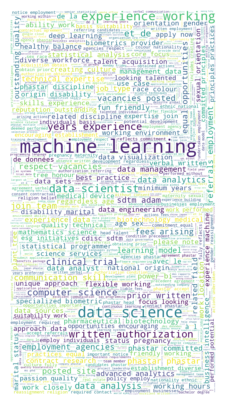

In [82]:
wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()